# Assignment 2, Team 13: Lydia Adzobu, Lace Grant, Brandon Tirado, Bradley Conger

## Problem 1

**I.	(10 points) Prepare and observe and your data.(a)Follow the following command to first build a simulated dataset and plot the data for visualization.**

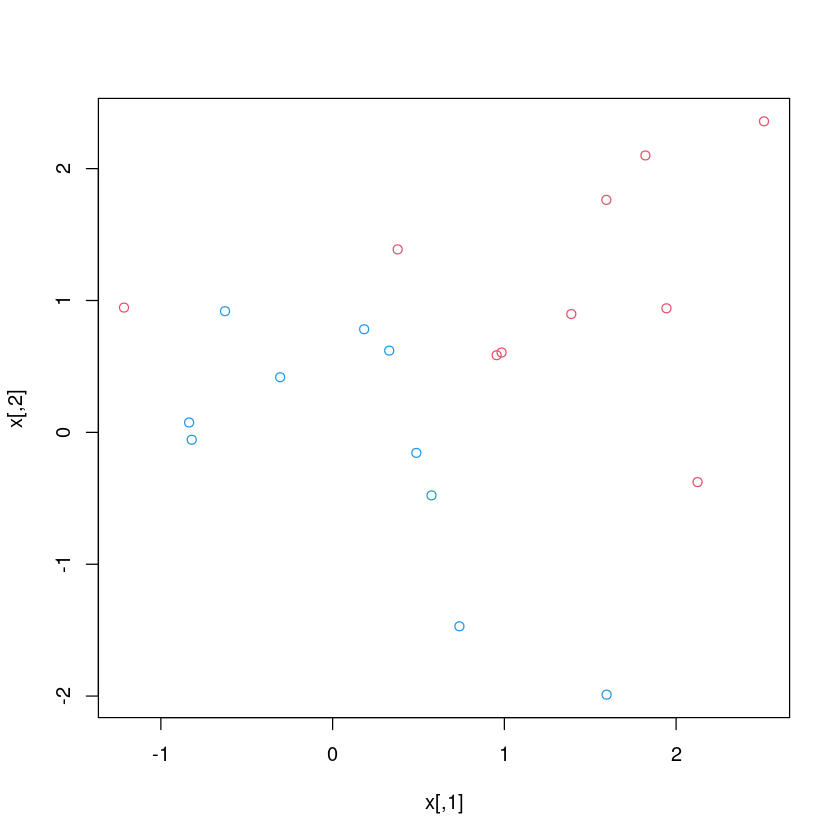

In [1]:
set.seed(1)
x <- matrix(rnorm(20 * 2), ncol = 2) #generate 20 pairs random variables in two dimensions
y <- c(rep(-1, 10), rep(1, 10)) # generate 10 of "-1" and 10 of "+1" as classifications
x[y == 1, ] <- x[y == 1, ] + 1 # the last ten rows of x( match with y=1) +1
plot(x, col = (3 - y))

dat.mmc <- data.frame(x = x, y = as.factor(y))

**(b)	Are the classes linearly separable, in other words, can MMC be used to classify the data?**

From the scatter plot above, it appears that the data points from the two classes (represented by different colors, red and blue) are not linearly separable. A Maximum Margin Classifier (MMC), which is a linear classifier, requires the data to be linearly separable to work effectively. Since there is overlap between the two classes in the feature space, an MMC cannot separate the data perfectly.

**II.	(20 points) Fit Support Vector Classifier (SVC) (a)	Create a data frame with the response y coded as a factor. Call library(e1071), and use function svm() to fit the support vector classifier. Plot the support vector classifier obtained. Set cost =10. You don’t need to normalize/scale the feature variables.
How many support vectors do you have?**

From the analysis below, there are a total of 7 support vectors.

[1]  1  2  5  7 14 16 17

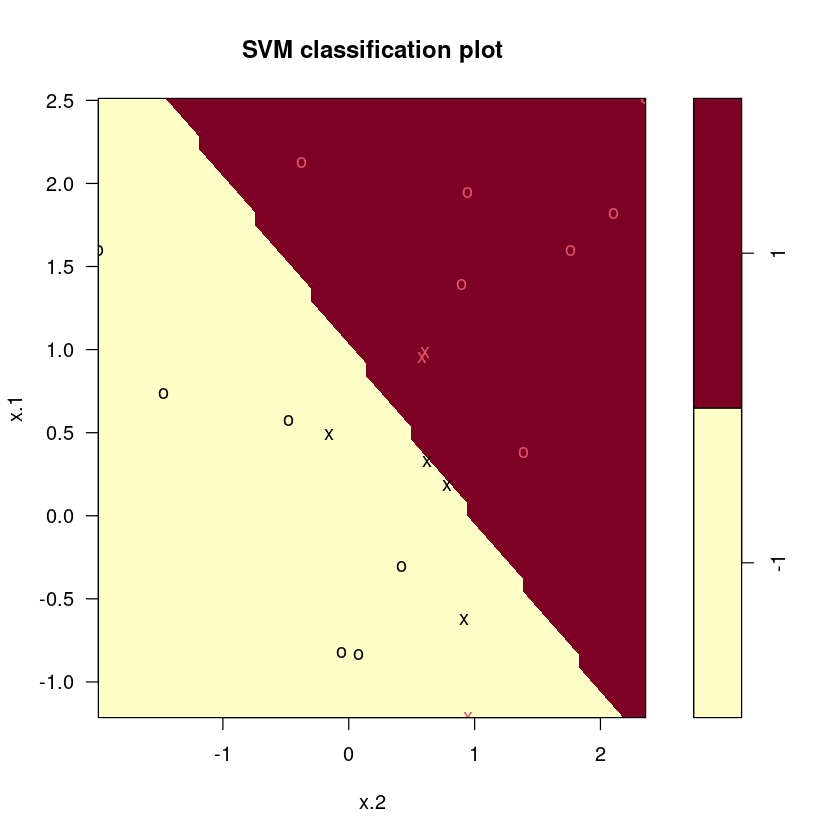

In [2]:
dat <- data.frame(x = x, y = as.factor(y))
library(e1071)
svmfit <- svm(y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)
plot(svmfit, dat)
svmfit$index

**(b)	Refit the classifier with cost =1. You don’t need to normalize/scale the feature variables. How many support vectors do you have?**

From the analysis below the, with cost = 1, the total number of support vectors is 10

[1]  1  2  5  7 10 13 14 15 16 17

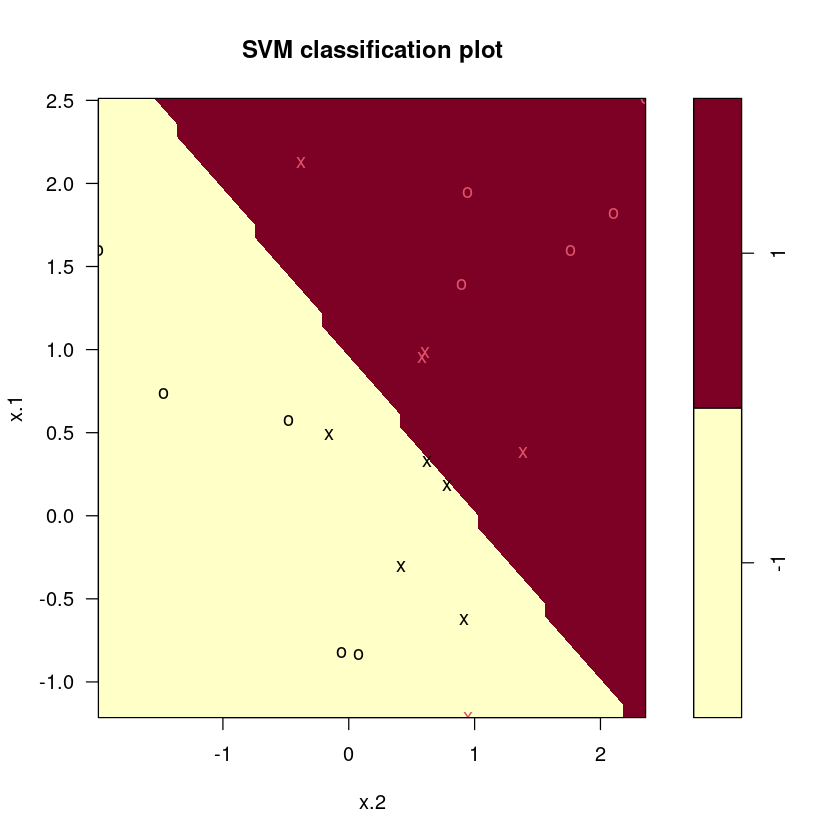

In [3]:
# (b) Refit SVC with cost = 1
svmfit1 <- svm(y ~ ., data = dat, kernel = "linear", cost = 1, scale = FALSE)
plot(svmfit1, dat)
svmfit1$index  # Get support vectors

**(c)	How does the cost value influence the classification? Why?**

Lower cost leads to more support vectors and a wider margin, while higher cost leads to fewer support vectors and a stricter margin.

**III.	(20 points) Perform cross-validation to test the classification for a range of cost. (a)	set.seed(1), use tune() to perform 10 fold cross validation for a set of cost c( 0.1, 1, 10, 100).  (b)	Access the errors with summary(). Which cost value gives you the lowest cross-validation error rate? (c)	Summarize the best model obtained.**

The cost of 0.1 gives the lowest error rate. A summary of the best model obtained is shown below. 

In [4]:
# (a) Perform 10-fold cross-validation
set.seed(1)
tune.out <- tune(svm, y ~ ., data = dat, kernel = "linear", ranges = list(cost = c(0.1, 1, 10, 100)))

# (b) View cross-validation results
summary(tune.out)  # Identify the best cost value

# (c) Best model
bestmod <- tune.out$best.model
summary(bestmod)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.05 

- Detailed performance results:
   cost error dispersion
1   0.1  0.05  0.1581139
2   1.0  0.15  0.2415229
3  10.0  0.15  0.2415229
4 100.0  0.15  0.2415229



Call:
best.tune(METHOD = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.1, 
    1, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




**IV.	(30 points) Predict the class label on a set of test observations.
(a)	Generate a test dataset with the following code
xtest <- matrix(rnorm(20 * 2), ncol = 2)
ytest <- sample(c(-1, 1), 20, rep = TRUE)
xtest[ytest == 1, ] <- xtest[ytest == 1, ] + 1
testdat <- data.frame(x = xtest , y = as.factor(ytest))**


In [5]:
# (a) Generate test dataset
xtest <- matrix(rnorm(20 * 2), ncol = 2)
ytest <- sample(c(-1, 1), 20, rep = TRUE)
xtest[ytest == 1, ] <- xtest[ytest == 1, ] + 1
testdat <- data.frame(x = xtest , y = as.factor(ytest))

**(b)	Use predict() function and the best model obtained in III(c) to make prediction for the test dataset. printout the confusion matrix. How is the performance of the model?**

Using the predict function, the model correctly classifies 17 observations when the cost is 0.1.

In [6]:
# (b) Predict using best model from III
ypred <- predict(bestmod, testdat)
table(predict = ypred, truth = testdat$y)

       truth
predict -1 1
     -1  9 1
     1   2 8

**(c)	Change c=10, redo (b). How is the performance of this model comparing with the one in (b)?**

From the analysis below, when the cost is set to 10, the model produces the same results. Essentially it performs the same as when the cost is set to 0.1, and correctly classifies 17 observations. 

In [7]:
# (c) Predict using cost = 10
svmfit10 <- svm(y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)
ypred10 <- predict(svmfit10, testdat)
table(predict = ypred10, truth = testdat$y)

       truth
predict -1 1
     -1  9 1
     1   2 8

**V.	(30 points) Fit Maximal Margin Classifier (MMC)
(a)	Generate new separable simulated data from the dataset in I(a) and plot it for visualization with the following code. Observe the plot, can the newly simulated data be linearly separated? 
x[y == 1, ] <- x[y == 1, ] + 0.5
plot(x, col = (y + 5) / 2, pch = 19)**


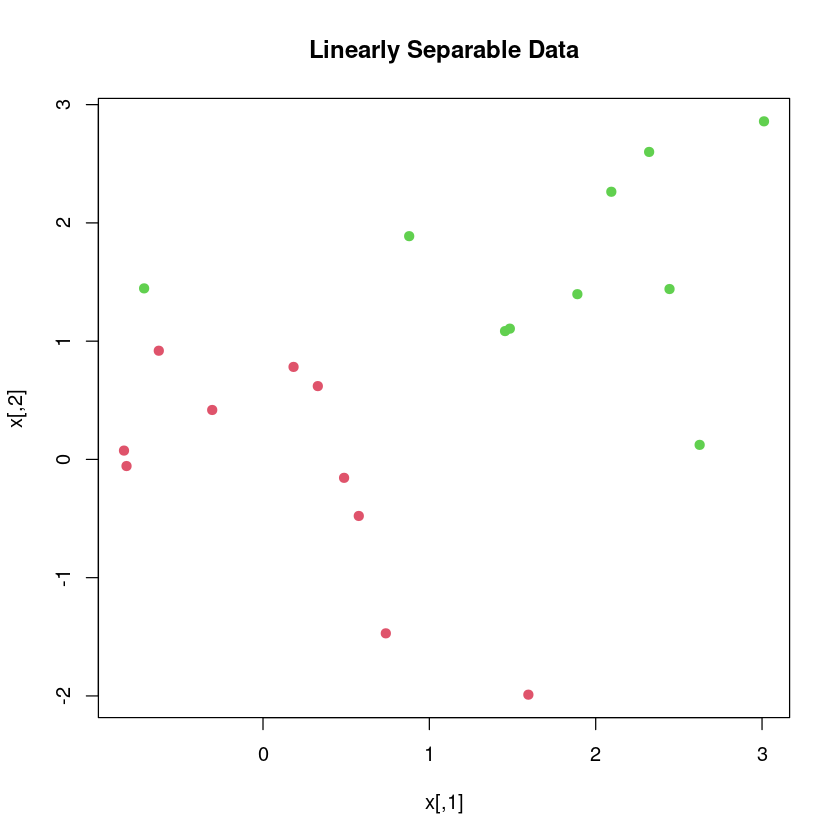

In [8]:
# (a) Modify data to make it separable
x[y == 1, ] <- x[y == 1, ] + 0.5
plot(x, col = (y + 5) / 2, pch = 19, main = "Linearly Separable Data")

**(b)	Call library(e1071), fit MMC with svm() function. Plot the MMC obtained. You need to set cost to be a very large number. You don’t need to normalize/scale the feature variables. 
How many support vectors do you have?**


The total number of support vectors is 3 having set the cost to be a very large number as show below. 

[1]  2 14 15

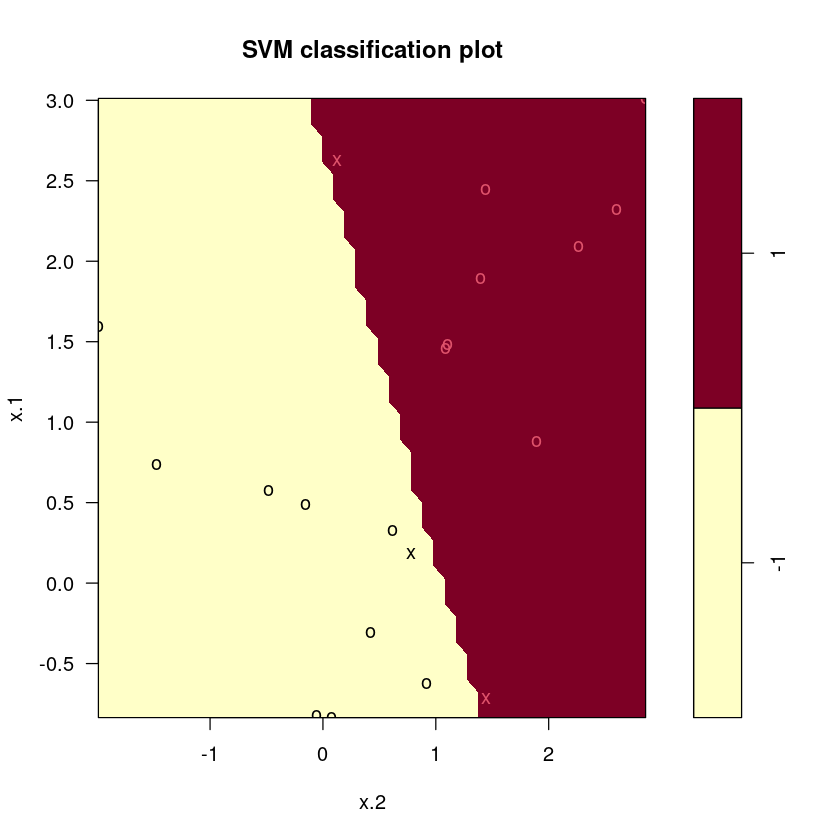

In [9]:
library(e1071)
# (b) Fit MMC with very high cost
dat <- data.frame(x = x, y = as.factor(y))
svmfit_mmc <- svm(y ~ ., data = dat, kernel = "linear", cost = 1e5, scale = FALSE)
plot(svmfit_mmc, dat)
svmfit_mmc$index  # Number of support vectors

**(c)	Use predict() function and the best model obtained in V(b) to make prediction for the test dataset (same from IV(a)). printout the confusion matrix. How is the performance of the model?**

In [10]:
# (c) Predict using MMC
ypred_mmc <- predict(svmfit_mmc, testdat)
table(predict = ypred_mmc, truth = testdat$y)

       truth
predict -1 1
     -1  9 4
     1   2 5

**VI.	(10 points) Compare the performance of MMC (from V(c) ) SVC (from 4(b)). Which one performs better? Why?**

With the SVC model with a cost of 0.1, the total number of observations correctly classified is 17, resulting in an accuracy score of 85%. The MMC model with the cost of 1e5 correctly classified only 14 variables resulting in an accuracy score of 70%.
SVC (cost = 10) performs better than MMC (cost = 1e5) because it achieves higher accuracy and generalizes better by allowing some flexibility in the margin. MMC is too rigid, leading to overfitting and poor generalization to new data.


Call:
svm(formula = y ~ ., data = dat.mmc, kernel = "linear", cost = 1e+05, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




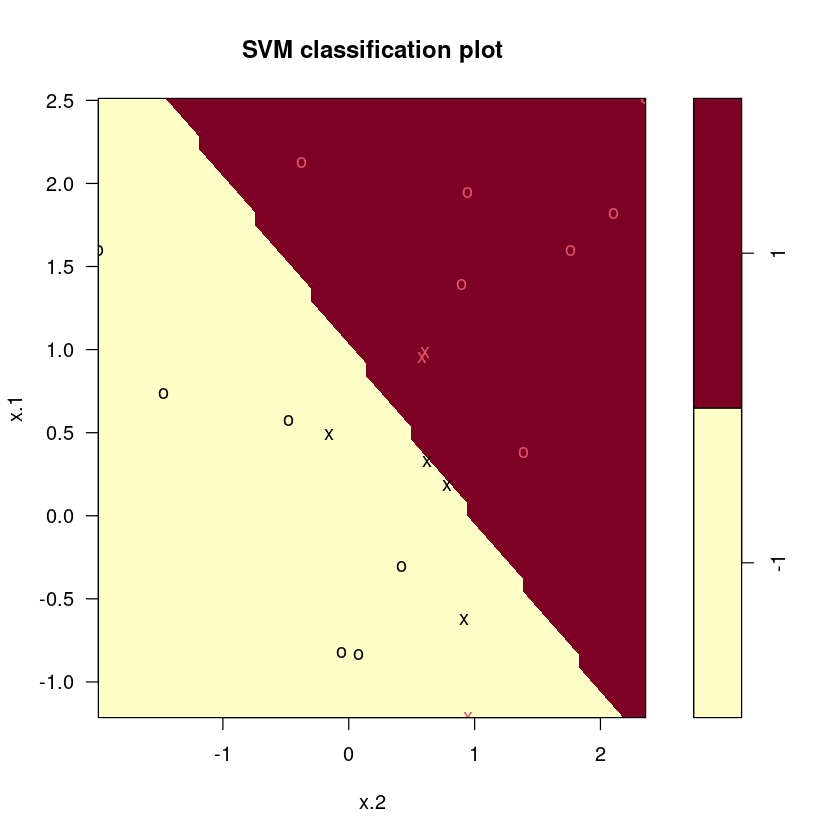

In [11]:
# Ensure the necessary library is loaded
library(e1071)

# Set seed for reproducibility
set.seed(1)

# Assuming dat.mmc and testdat are already defined in the environment
# If not, you need to load or create these datasets before fitting the model

# Fit the SVM model
svcfit.mmc <- svm(y~., data = dat.mmc, kernel = "linear", cost = 100000, scale = FALSE)

# Display the summary of the model
summary(svcfit.mmc)

# Plot the SVM model
plot(svcfit.mmc, dat.mmc)

# # Predict using the fitted model
# ypred <- predict(svcfit.mmc, testdat)

# # Create a confusion matrix
# table(predict = ypred, truth = testdat$y)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  4


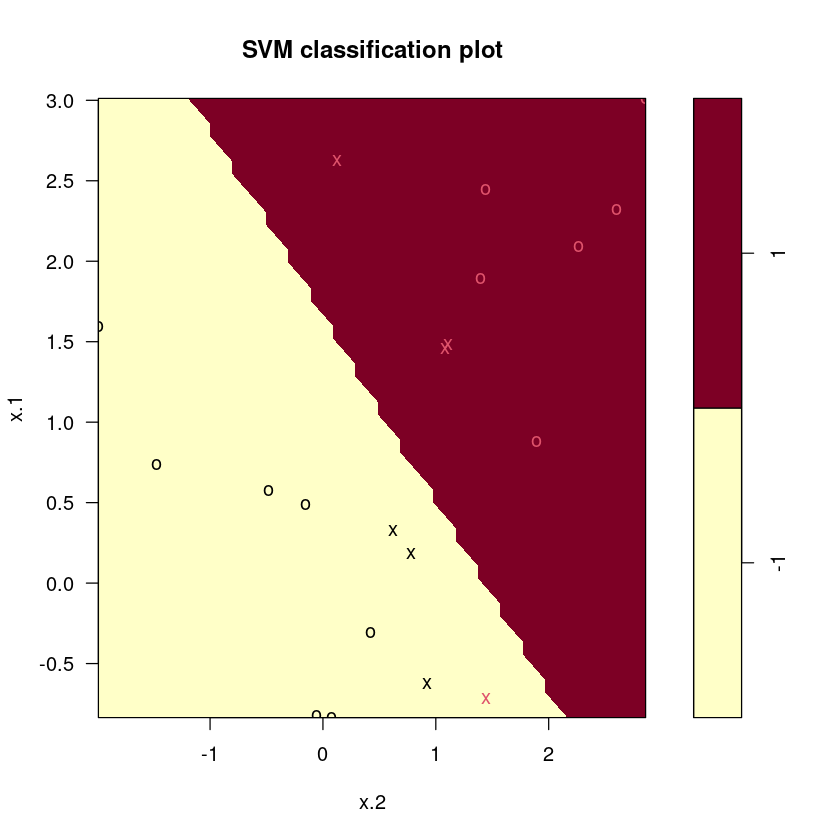

In [12]:
# Corrected R code
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)
svmfit <- svm(y ~ ., data = dat, kernel = "linear", cost = 1, scale = FALSE)
plot(svmfit, dat)

In [13]:
set.seed(1)
tune.out <- tune(svm, y ~ ., data = dat, kernel = "linear", ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.05 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.45  0.4972145
2 1e-02  0.45  0.4972145
3 1e-01  0.05  0.1581139
4 1e+00  0.05  0.1581139
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.10  0.2108185


## Question 2

**Follow the Lab of 9.6.2 of the textbook. In the problem, we practice SVM with simulated data for classification.** 
**I.	(10 points) prepare and observe and your data.** 
**(a)	Follow the following command to first build a simulated dataset with nonlinear class boundary. set.seed(1)**

x <- matrix(rnorm(200 * 2), ncol = 2)
x[1:100, ] <- x[1:100, ] + 2
x[101:150, ] <- x[101:150, ] - 2
y <- c(rep(1, 150), rep(2, 50))

**(b)	Plot the data for visualization. Are the classes linearly separable or soft separable, in other words, can MMC or SVC be used to classify the data?****

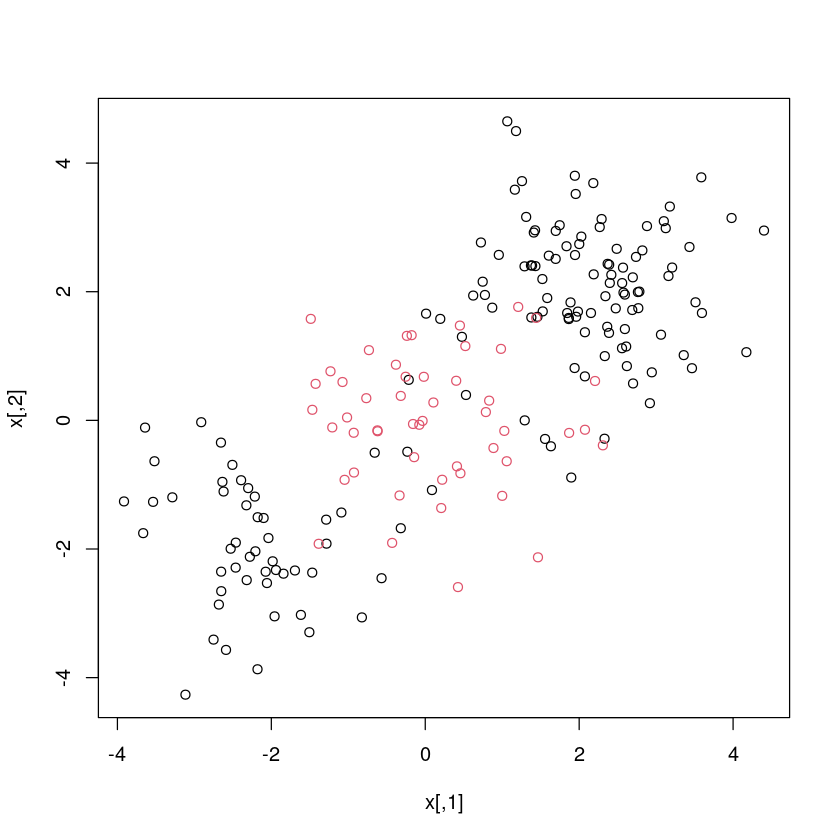

In [14]:
set.seed(1)
x <- matrix(rnorm(200 * 2), ncol = 2)
x[1:100, ] <- x[1:100, ] + 2
x[101:150, ] <- x[101:150, ] - 2
y <- c(rep(1, 150), rep(2, 50))
dat <- data.frame(x = x, y = as.factor(y))
plot(x, col = y)

Since the classes are not linearly separable support vector classifier will be used, especially with a soft margin or SVM with a kernal would be more approiate 

**II.	(40 points) Fit Support Vector Machine (SVM)**
**(c)	Create a data frame with the response y coded as a factor. Separate the dataset into half training data, half test data.**
**Call library(e1071), and use function svm() to fit the support vector machine on the training day with radical kernel and gamma=1, cost=1. Plot the SVM.**
**How many support vectors do you have?**

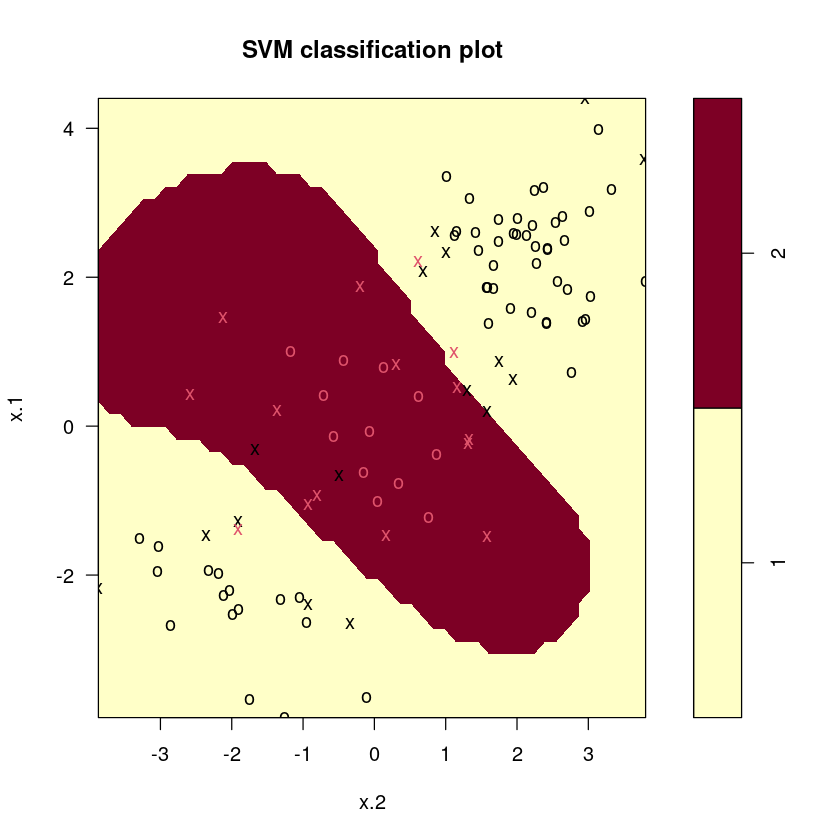

In [15]:
# Load the necessary library
library(e1071)

# Sample data
train <- sample(200, 100)

# Fit the SVM model
svmfit <- svm(y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, cost = 1)

# Plot the SVM model
plot(svmfit, dat[train, ])

In [16]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  31

 ( 16 15 )


Number of Classes:  2 

Levels: 
 1 2




With the gamma=1 and cost =1 there are 31 support vectors. 

(d) Refit the SVM on the training data with gamma=10, cost=1. You need to normalize/scale the feature variables. How many support vectors do you have?


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 10, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  68

 ( 42 26 )


Number of Classes:  2 

Levels: 
 1 2




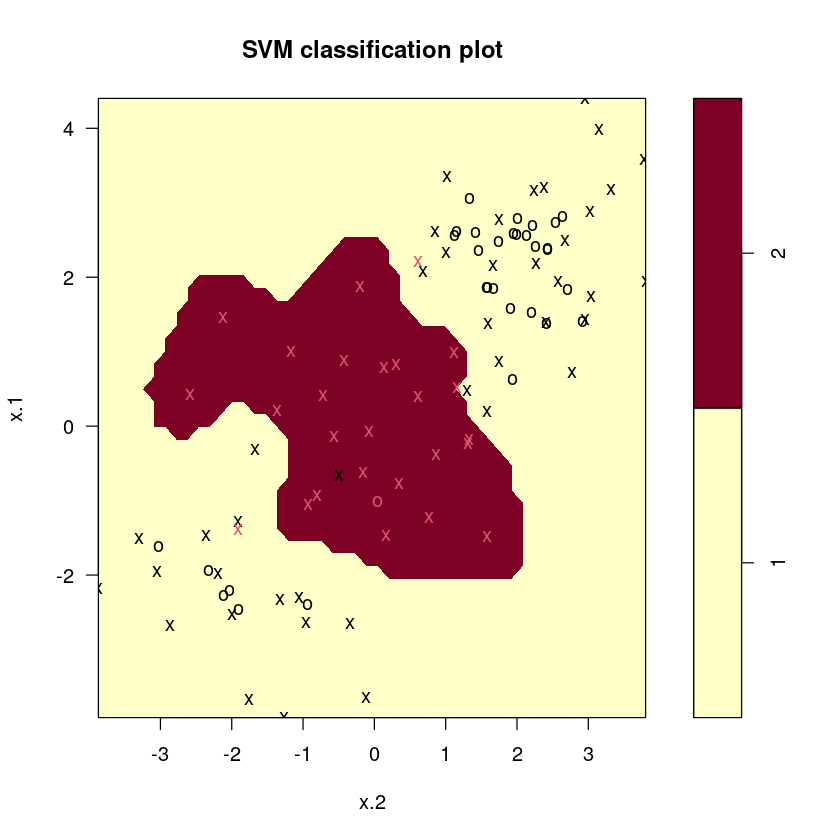

In [17]:
svmfit2 <- svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 10, cost = 1)
plot(svmfit2, dat[train, ])
summary(svmfit2)

There are 68 support vectors

(e)	Refit the SVM on the training data with gamma=1, cost=0.1. You need to normalize/scale the feature variables. How many support vectors do you have?


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  0.1 

Number of Support Vectors:  57

 ( 30 27 )


Number of Classes:  2 

Levels: 
 1 2




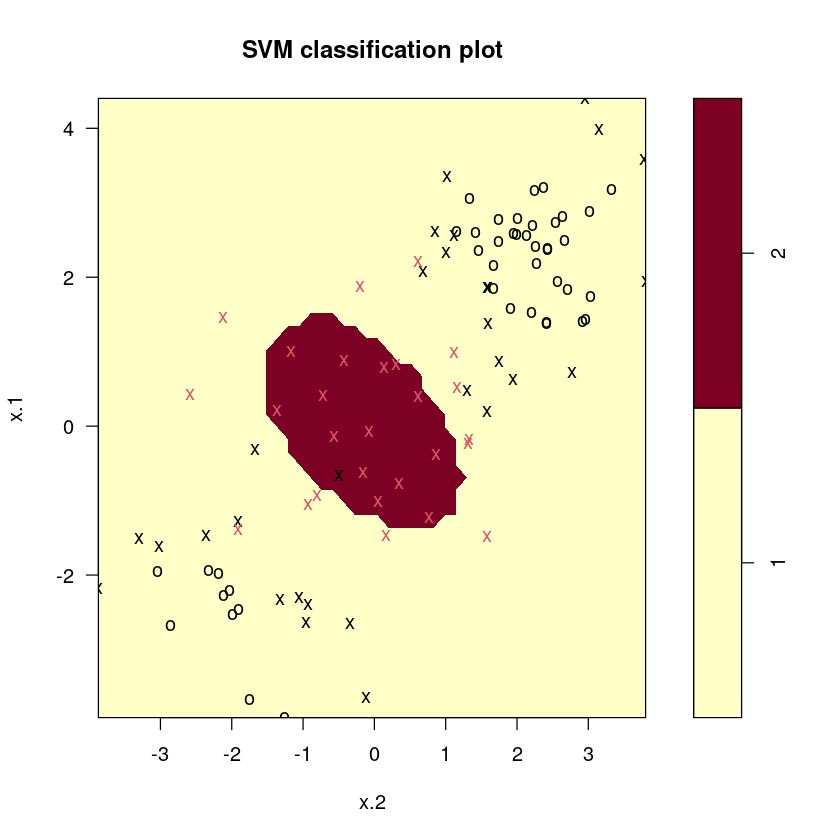

In [18]:
svmfit3 <- svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, cost = 0.1)
plot(svmfit3, dat[train, ])
summary(svmfit3)

There are 57 support vectors

(f)	How does the cost value and gamma influence the classification? Why?

The cost controls the tradeoff between maximizing the margin and minimizing classification error. A high c leads to a smaller margin and overfitting, while a low c allows more misclassification. Gamma determines how much influence each point has. High gamma leads to overfitting, while low results in a better generalization. 

III.	(30 points) Perform cross-validation to test the classification for a range of cost and a range of gamma.
(g)	set.seed(1), use tune() to perform 10 fold cross validation for a set of cost cost=c(0.1, 1, 10, 100) and a set of gamma = c(0.5, 1, 2, 4)

(h)	What are the best choices of cost and gamma for the training data from cross-validation in (a)? What is the performance of the best parameters?

(i)	Predict with the best model from (a) on the test dataset. How is the performance? 

In [19]:
set.seed(1)
tune.out <- tune(svm, y ~ ., data = dat[train, ],
                 kernel = "radial",
                 ranges = list(
                   cost = c(0.1, 1, 10, 100, 100),
                   gamma = c(0.5, 1, 2, 4)
                 ))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.07 

- Detailed performance results:
    cost gamma error dispersion
1    0.1   0.5  0.26 0.15776213
2    1.0   0.5  0.07 0.08232726
3   10.0   0.5  0.07 0.08232726
4  100.0   0.5  0.14 0.15055453
5  100.0   0.5  0.14 0.15055453
6    0.1   1.0  0.22 0.16193277
7    1.0   1.0  0.07 0.08232726
8   10.0   1.0  0.09 0.07378648
9  100.0   1.0  0.12 0.12292726
10 100.0   1.0  0.12 0.12292726
11   0.1   2.0  0.27 0.15670212
12   1.0   2.0  0.07 0.08232726
13  10.0   2.0  0.11 0.07378648
14 100.0   2.0  0.12 0.13165612
15 100.0   2.0  0.12 0.13165612
16   0.1   4.0  0.27 0.15670212
17   1.0   4.0  0.07 0.08232726
18  10.0   4.0  0.09 0.07378648
19 100.0   4.0  0.13 0.14181365
20 100.0   4.0  0.13 0.14181365


The best cost and gamma are 1 and .5 respectively. These parameters achieved the best performance with an error rate of .07. 

In [20]:
table(
true = dat[-train, "y"],
pred = predict(
tune.out$best.model, newdata = dat[-train, ]
)
)

    pred
true  1  2
   1 67 10
   2  2 21

The model correctly classified 88% of the test data. 

## Problem 3

Problem 3.  (110 points total ) Practice on Support Vector Classifier and Support Vector Machine
Use OJ dataset. With the dataset, we wish to predict a customer’s purchase decision by the price and loyalty. 


**I. (10 points) prepare and observe and your data.
(a) Select columns “Purchase”, “PriceCH”, “LoyalCH” to build the new dataset for SVM test, while “Purchase”as the response, “PriceCH” and “LoyalCH” as the predictors/independent variables. Plot the data and observe them, Are the classes linearly soft separable or soft separable, in other words, can SVC be used to classify the data?**

The plot below shows relationship between customers' loyality score for citrus hill and the price of citrus hill with the data points coloured by purchase decison(CH or MM). The data points overlap significantly, hence the classes are soft separable and the use of the SVC is appropriate as it allows for misclassification. 

# Downloading packages -------------------------------------------------------
- Downloading ISLR2 from CRAN ...               OK [4 Mb in 0.25s]
Successfully downloaded 1 package in 1.1 seconds.

The following package(s) will be installed:
- ISLR2 [1.3-2]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing ISLR2 ...                          OK [installed binary and cached in 0.79s]


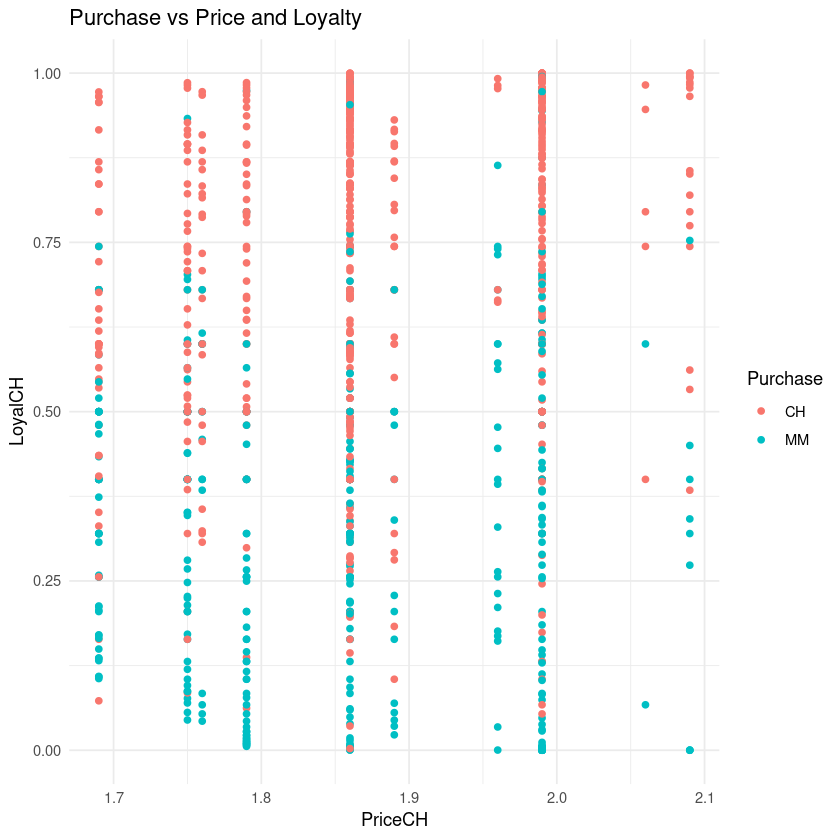

In [21]:
install.packages("ISLR2")
library(ISLR2)
data(OJ)
attach(OJ)

# Load necessary libraries
library(e1071)
library(ggplot2)

# Extracting required columns
OJ_data <- OJ[, c("Purchase", "PriceCH", "LoyalCH")]

# Convert 'Purchase' into a factor variable
OJ_data$Purchase <- as.factor(OJ_data$Purchase)

# Plot the data to visually inspect if it's linearly separable
ggplot(OJ_data, aes(x = PriceCH, y = LoyalCH, color = Purchase)) + 
  geom_point() +
  theme_minimal() +
  labs(title = "Purchase vs Price and Loyalty")


**(b) Set.seed(1), choose 80% of the data as training data, and the rest as test data.**

In [22]:
set.seed(1)  # Split the data into training (80%) and test (20%) sets 
train_indices <- sample(1:nrow(OJ_data), size = 0.8 * nrow(OJ_data)) 
train_data <- OJ_data[train_indices, ] 
test_data <- OJ_data[-train_indices, ]

**II. (30 points) Fit the SVC model (a) Fit the SVC model on the training data with cost =1. Plot the support vector classifier obtained. You need to normalize/scale the feature variables. How many support vectors do you have? What’s the performance?**

[1]   2   5   9  11  13  14  15  19  20  24  25  28  34  43  47  49  55  58
 [19]  60  61  71  74  83  88  91 102 104 106 111 115 118 119 128 141 149 159
 [37] 161 167 172 176 179 181 189 191 193 206 207 208 209 212 215 222 225 226
 [55] 232 235 236 241 242 243 244 246 250 253 258 260 265 266 269 274 278 281
 [73] 286 288 289 301 309 310 311 318 322 324 332 338 341 342 347 348 349 357
 [91] 362 368 370 372 373 374 376 379 384 386 387 398 399 400 404 408 414 426
[109] 428 431 434 436 442 443 448 451 452 454 458 461 464 472 478 483 489 501
[127] 502 506 510 518 520 521 523 525 526 528 531 532 536 539 549 566 571 576
[145] 579 581 586 587 589 591 592 595 602 610 611 613 626 627 633 634 636 643
[163] 647 648 652 658 659 662 665 669 670 677 679 681 686 691 698 700 705 708
[181] 717 723 725 730 734 735 747 753 756 774 776 779 784 786 793 794 801 808
[199] 810 811 819 821 824 832 837 840 849   6   7  12  16  17  21  31  33  35
[217]  37  38  41  42  45  51  52  53  56  57  62  66  67  72  77  81  85  99
[235] 105 107 108 110 113 116 121 125 126 129 138 139 140 142 144 146 156 164
[253] 168 178 187 188 194 202 204 205 221 227 228 229 231 238 245 249 256 264
[271] 267 270 272 280 292 295 296 298 304 305 306 313 316 317 320 325 326 328
[289] 334 340 346 352 355 358 360 375 382 389 395 409 413 415 416 418 419 420
[307] 424 430 433 441 447 455 457 459 462 465 468 469 471 474 475 476 479 484
[325] 490 491 494 497 500 511 529 530 534 538 541 543 544 545 557 570 573 575
[343] 584 590 593 599 601 603 605 612 614 618 628 629 630 632 637 638 639 640
[361] 649 655 661 664 667 674 676 685 689 696 697 704 709 712 713 714 715 728
[379] 732 738 742 746 749 750 758 760 762 763 767 770 772 778 782 783 791 797
[397] 798 800 805 812 820 823 826 828 829 830 834 836 848 852 854 856

[1] 412


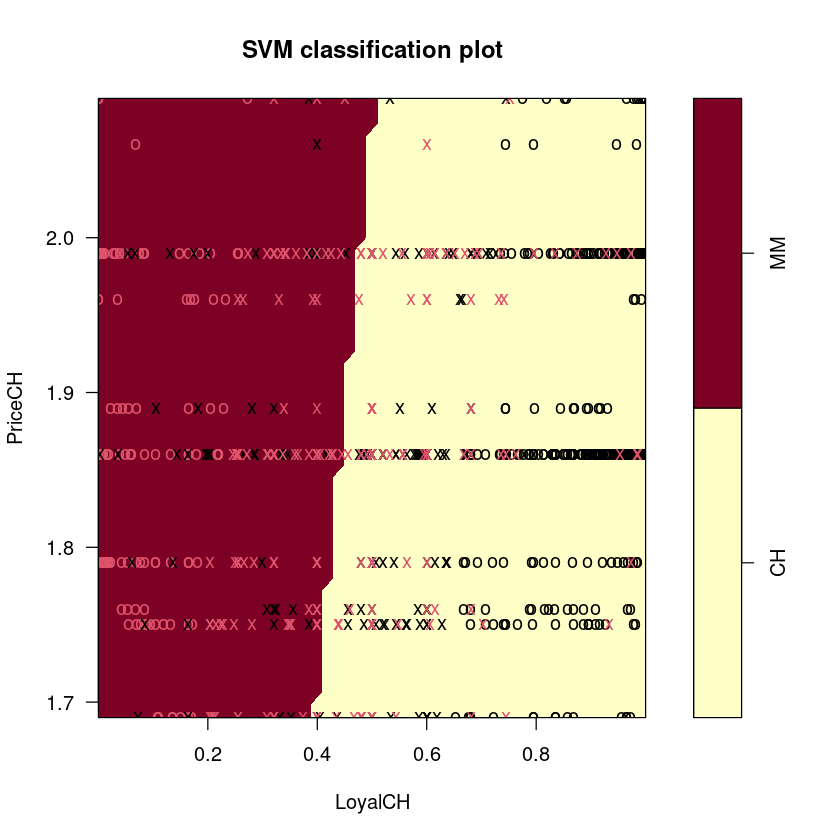

In [23]:
# Normalize the data (scale features)
train_data_scaled <- scale(train_data[, c("PriceCH", "LoyalCH")])

# Fit the SVC model with cost = 1
svmfit <- svm(Purchase ~ PriceCH + LoyalCH, data = train_data, kernel = "linear", cost = 1, scale = TRUE)

# Plot the SVC model
plot(svmfit, train_data)

# Number of support vectors
svmfit$index
num_support_vectors_svmfit <- length(svmfit$index)
print(num_support_vectors_svmfit)

In [24]:

# Evaluate the performance on training data
train_preds <- predict(svmfit, train_data)
confusion_matrix_train <- table(Predicted = train_preds, Actual = train_data$Purchase)
print(confusion_matrix_train)
accuracy_train <- sum(diag(confusion_matrix_train)) / sum(confusion_matrix_train)
accuracy_train

# Extract values from the confusion matrix
TP <- confusion_matrix_train["CH", "CH"]
FN <- confusion_matrix_train["MM", "CH"]
FP <- confusion_matrix_train["CH", "MM"]
TN <- confusion_matrix_train["MM", "MM"]

# Compute Sensitivity (Recall for CH)
sensitivity <- TP / (TP + FN)

# Compute Specificity (True Negative Rate for CH)
specificity <- TN / (TN + FP)

# Print results
cat("Sensitivity:", sensitivity, "\n")
cat("Specificity:", specificity, "\n")


         Actual
Predicted  CH  MM
       CH 442  96
       MM  72 246


[1] 0.8037383

Sensitivity: 0.8599222 
Specificity: 0.7192982 


From the above analysis, there are 412 support vectors when the linear kernel is used with a cost of 1. The above model correctly predicts purchases 80% of the time based on the accuracy score when used on the training data. Based on the sensisitivity score, the model correctly predicts 86% of CH purchases. 

**(b)Tune the model above with a range of cost = c( 0.1, 1,10, 100). What are the best cost and the best** **performance.**

The best model uses a cost of 0.1 and has 426 support vectors as shown in the analysis below

In [25]:
# Tune the model with a range of cost values
tune_out <- tune(svm, Purchase ~ PriceCH + LoyalCH, data = train_data, kernel = "linear", 
                 ranges = list(cost = c(0.1, 1, 10, 100)))

# Best cost and corresponding performance
best_model <- tune_out$best.model
best_cost <- tune_out$best.parameters$cost
summary(tune_out)

best_model
best_cost


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1997811 

- Detailed performance results:
   cost     error dispersion
1   0.1 0.1997811 0.04965895
2   1.0 0.2091382 0.05442010
3  10.0 0.2091382 0.05442010
4 100.0 0.2091382 0.05442010



Call:
best.tune(METHOD = svm, train.x = Purchase ~ PriceCH + LoyalCH, data = train_data, 
    ranges = list(cost = c(0.1, 1, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  426


[1] 0.1

**(c)Use the best cost from (b) to predict on the test data. What’s the performance?**

When the best cost (0.1) is used, the model's overall accuracy score is 82.2% when used on the test data as shown in the analysis below. The model is able to predict citrus hill(CH) purchases correctly 86% of the time based on the sensitivity score.

In [26]:
# Predict on the test data using the best model
test_preds <- predict(tune_out$best.model, test_data)

# Evaluate the performance on test data
confusion_matrix_test <- table(Predicted = test_preds, Actual = test_data$Purchase)
confusion_matrix_test
accuracy_test <- sum(diag(confusion_matrix_test)) / sum(confusion_matrix_test)
accuracy_test

# Extract values from the confusion matrix
TP1 <- confusion_matrix_train["CH", "CH"]
FN1 <- confusion_matrix_train["MM", "CH"]
FP1 <- confusion_matrix_train["CH", "MM"]
TN1 <- confusion_matrix_train["MM", "MM"]

# Compute Sensitivity (Recall for CH)
sensitivity <- TP1 / (TP1 + FN1)

# Compute Specificity (True Negative Rate for CH)
specificity <- TN1 / (TN1 + FP1)

# Print results
cat("Sensitivity:", sensitivity, "\n")
cat("Specificity:", specificity, "\n")


         Actual
Predicted  CH  MM
       CH 128  27
       MM  11  48

[1] 0.8224299

Sensitivity: 0.8599222 
Specificity: 0.7192982 


**III.	(30 points) Fit the SVM model with radical kernel.
(a)	Fit the SVM model on the training data with radical kernel, set cost =1, gamma=1. Plot the SVM obtained. How many support vectors do you have? What’s performance of the model on the training data?**



[1]   2   5   9  13  14  15  19  20  24  25  29  34  40  43  49  55  60  61
 [19]  71  74  83  88  91 102 104 106 115 118 119 128 149 155 161 167 172 176
 [37] 179 181 183 189 190 199 206 207 208 209 212 214 215 220 222 225 226 235
 [55] 236 241 242 243 244 246 250 253 258 260 265 266 269 273 274 278 281 283
 [73] 286 289 293 294 301 309 310 311 318 338 341 342 343 347 348 349 357 368
 [91] 370 372 373 374 376 379 384 387 398 400 403 408 414 426 431 434 436 442
[109] 443 448 452 453 454 458 460 464 472 473 477 478 483 502 506 510 517 518
[127] 520 521 523 525 526 528 531 532 539 548 549 571 576 577 579 586 589 592
[145] 595 598 602 610 611 613 624 626 627 633 634 636 643 647 648 652 658 659
[163] 662 665 669 670 671 675 677 679 686 691 698 700 708 717 719 722 723 730
[181] 734 735 753 756 784 786 794 801 807 810 811 819 824 832 837 840 849 851
[199] 855   6   7  12  17  21  31  35  37  38  42  51  52  53  57  62  66  67
[217]  72  77  81  85  99 105 107 108 109 110 114 116 121 125 129 139 140 144
[235] 146 156 157 158 160 162 168 169 180 185 187 188 194 201 202 205 221 224
[253] 227 228 229 231 238 245 249 256 264 267 270 272 280 282 284 292 295 296
[271] 304 305 306 313 316 317 320 325 326 328 334 346 352 355 358 360 369 375
[289] 395 406 409 413 415 416 418 419 424 433 455 459 462 465 467 468 469 474
[307] 475 479 490 491 494 497 529 530 534 538 543 544 545 557 573 575 578 584
[325] 590 593 599 601 603 605 609 612 614 618 628 629 630 632 637 638 639 640
[343] 646 649 655 661 664 667 685 689 696 697 704 709 712 713 714 715 731 732
[361] 742 746 749 750 758 763 767 770 772 778 782 783 791 795 797 799 800 805
[379] 816 817 820 823 826 827 828 829 830 834 848 850 852 854 856

[1] 393


[1] 0.8095794

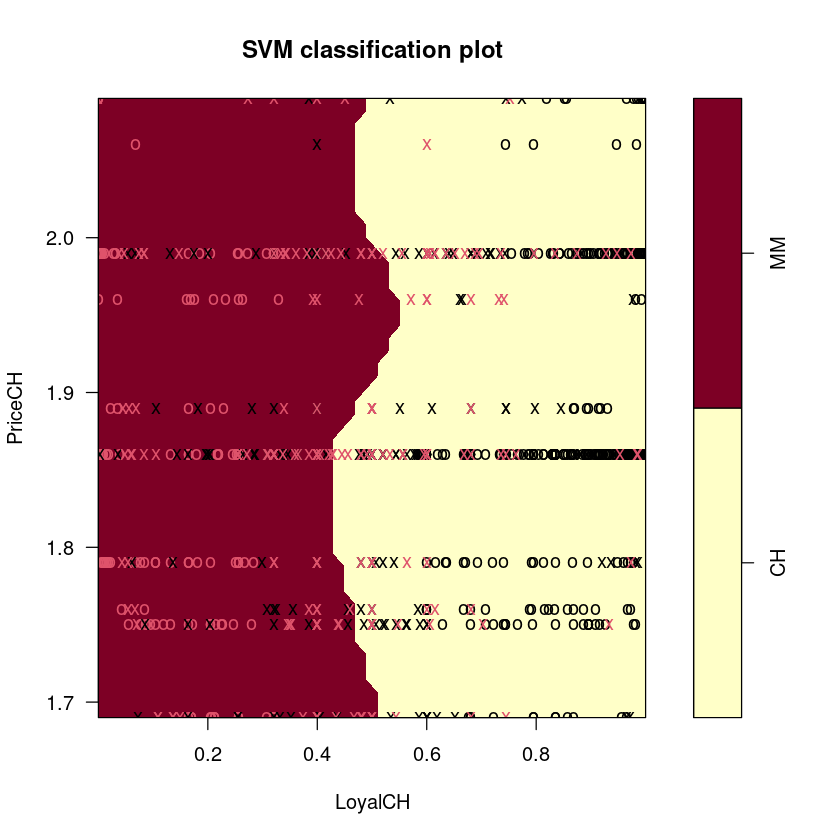

In [27]:
# Fit the SVM model with radial kernel
svm_radial <- svm(Purchase ~ PriceCH + LoyalCH, data = train_data, kernel = "radial", cost = 1, gamma = 1)

# Plot the SVM model
plot(svm_radial, train_data)

# Number of support vectors
svm_radial$index
num_support_vectors <- length(svm_radial$index)
print(num_support_vectors)

# Evaluate performance on training data
train_preds_radial <- predict(svm_radial, train_data)
confusion_matrix_train_radial <- table(Predicted = train_preds_radial, Actual = train_data$Purchase)
accuracy_train_radial <- sum(diag(confusion_matrix_train_radial)) / sum(confusion_matrix_train_radial)
accuracy_train_radial


From the above analysis, using the radial kernel the model has 393 support vectors and the model correctly predicts purchases 81% of the time based on the overall accuracy score. 

**(b)Tune the model above with a range of cost = c(0.1, 1, 10, 100) and range of gamma = c(0.5, 1, 2, 4, 8). What are the best cost, best gamma, and the best performance.**

In [28]:
# Tune the model with a range of cost and gamma
tune_out_radial <- tune(svm, Purchase ~ PriceCH + LoyalCH, data = train_data, kernel = "radial", 
                        ranges = list(cost = c(0.1, 1, 10, 100), gamma = c(0.5, 1, 2, 4, 8)))

# Best cost and gamma
best_cost <- tune_out_radial$best.model$cost
best_gamma <- tune_out_radial$best.model$gamma
summary(tune_out_radial)

best_cost
best_gamma


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     1

- best performance: 0.1973324 

- Detailed performance results:
    cost gamma     error dispersion
1    0.1   0.5 0.1996306 0.03321714
2    1.0   0.5 0.1984952 0.02665657
3   10.0   0.5 0.1985089 0.02619590
4  100.0   0.5 0.1973461 0.02149985
5    0.1   1.0 0.2019973 0.02933983
6    1.0   1.0 0.1973324 0.02638499
7   10.0   1.0 0.2032148 0.01856261
8  100.0   1.0 0.1985226 0.03009657
9    0.1   2.0 0.2008482 0.02607891
10   1.0   2.0 0.2020383 0.01993924
11  10.0   2.0 0.2031737 0.02450409
12 100.0   2.0 0.2090287 0.02282261
13   0.1   4.0 0.2055130 0.02566713
14   1.0   4.0 0.2043776 0.01854117
15  10.0   4.0 0.2090287 0.02282261
16 100.0   4.0 0.2055677 0.02310989
17   0.1   8.0 0.2020520 0.01848378
18   1.0   8.0 0.2043912 0.02173304
19  10.0   8.0 0.2090561 0.02435454
20 100.0   8.0 0.2102189 0.02756203


[1] 1

[1] 1

From the above analysis, the best model uses a cost of 1.0 and a gamma of 1.

**(c)	Use the best cost from (b) to predict on the test data. What’s the performance?**

In [29]:
# Predict on the test data
test_preds_radial <- predict(tune_out_radial$best.model, test_data)

# Evaluate performance on test data
confusion_matrix_test_radial <- table(Predicted = test_preds_radial, Actual = test_data$Purchase)
accuracy_test_radial <- sum(diag(confusion_matrix_test_radial)) / sum(confusion_matrix_test_radial)
accuracy_test_radial
confusion_matrix_test_radial

[1] 0.8130841

         Actual
Predicted  CH  MM
       CH 124  25
       MM  15  50

Using the best model with a cost of 1 and gamma of 1, the model correctly predicts purchases 81.3% of the time based on the accuracy score. 

**IV.	(30 points) Fit the SVM model with polynomial kernel.
(a)	Fit the SVM model on the training data with polynomial kernel, set degree =2. cost=1, Plot the SVM obtained. How many support vectors do you have? What’s the performance?**

[1]   1   2   3   8  10  14  15  18  19  20  23  24  27  29  30  32  34  36
 [19]  39  40  43  46  48  50  54  55  58  61  63  64  65  68  69  70  71  73
 [37]  74  75  78  80  82  83  86  95  97  98 101 103 111 115 117 120 122 123
 [55] 127 130 131 132 133 134 135 136 137 143 145 149 151 152 153 154 155 165
 [73] 166 167 170 171 173 176 179 183 189 190 192 197 198 199 203 207 209 210
 [91] 211 212 213 214 215 218 219 220 222 223 230 233 234 236 237 241 242 243
[109] 244 252 254 255 258 259 260 263 265 266 271 275 277 279 283 285 286 287
[127] 289 290 293 294 297 299 307 308 311 312 314 318 321 323 329 330 336 338
[145] 344 347 348 354 356 357 359 363 364 366 367 368 376 377 379 380 381 384
[163] 385 388 391 398 399 411 414 422 423 425 427 429 431 437 438 440 442 444
[181] 445 446 449 450 452 453 460 463 464 470 477 480 482 485 486 487 489 492
[199] 493 495 499 503 504 505 507 510 512 515 516 517 519 521 522 524 528 533
[217] 535 537 546 548 549 550 552 554 555 556 559 560 561 562 564 565 571 572
[235] 574 579 582 585 586 594 597 600 604 606 610 611 620 621 622 623 624 627
[253] 631 634 635 642 643 645 648 651 653 657 658 659 663 666 669 671 672 673
[271] 675 678 683 684 692 693 695 699 701 702 711 716 718 719 720 723 726 727
[289] 733 734 735 737 740 741 744 745 751 752 754 756 757 764 769 771 773 774
[307] 775 777 784 785 787 790 796 801 803 804 807 808 809 810 814 815 818 824
[325] 832 835 838 841 842 846 851 853   4   6   7  12  16  17  21  22  31  33
[343]  35  37  38  41  42  45  51  52  53  56  57  59  62  66  67  72  77  79
[361]  81  84  85  87  89  92  94  96  99 100 105 107 108 109 110 112 113 114
[379] 116 121 125 126 129 138 139 140 142 144 146 148 156 157 158 160 162 163
[397] 164 168 169 175 178 180 185 187 188 194 195 200 201 202 204 205 216 217
[415] 221 224 227 228 229 231 238 239 245 247 248 249 251 256 257 261 262 264
[433] 267 268 270 272 276 280 282 284 291 292 295 296 298 302 303 304 305 306
[451] 313 316 317 320 325 326 328 331 333 334 335 337 339 340 346 350 352 355
[469] 358 360 369 371 375 378 382 383 389 395 397 401 406 407 409 410 412 413
[487] 415 416 417 418 419 420 421 424 430 433 439 441 447 455 457 459 462 465
[505] 466 467 468 469 471 474 475 476 479 481 484 490 491 494 497 498 500 509
[523] 511 513 514 529 530 534 538 540 541 543 544 545 547 553 557 563 567 568
[541] 570 573 575 578 580 583 584 588 590 593 596 599 601 603 605 607 608 609
[559] 612 614 615 616 617 618 619 628 629 630 632 637 638 639 640 641 646 649
[577] 654 655 656 660 661 664 667 674 676 680 685 687 688 689 690 694 696 697
[595] 703 704 706 709 710 712 713 714 715 721 724 728 729 731 732 738 742 746
[613] 749 750 755 758 759 760 762 763 766 767 768 770 772 778 780 781 782 783
[631] 788 789 791 795 797 798 799 800 805 806 812 816 820 822 823 825 826 827
[649] 828 829 830 831 833 834 836 839 843 845 847 848 850 852 854 856

[1] 664


[1] 0.6401869

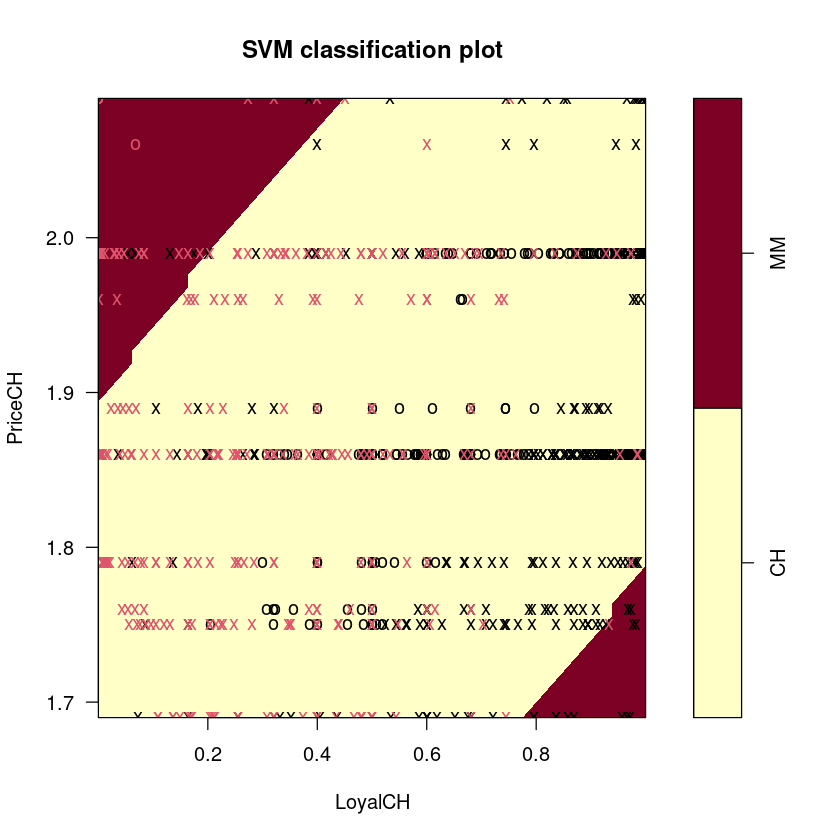

In [30]:
# Fit the SVM model with polynomial kernel, degree = 2
svm_poly2 <- svm(Purchase ~ PriceCH + LoyalCH, data = train_data, kernel = "polynomial", degree = 2, cost = 1)

# Plot the SVM model
plot(svm_poly2, train_data)

# Number of support vectors
svm_poly2$index
num_support_vectors2 <- length(svm_poly2$index)
print(num_support_vectors2)

# Evaluate performance on training data
train_preds_poly2 <- predict(svm_poly2, train_data)
confusion_matrix_train_poly2 <- table(Predicted = train_preds_poly2, Actual = train_data$Purchase)
accuracy_train_poly2 <- sum(diag(confusion_matrix_train_poly2)) / sum(confusion_matrix_train_poly2)
accuracy_train_poly2


From the analysis above the SVC model with the polynomial kernel (degree: 2 cost: 1) has 664 support vectors and an accuracy score of 64.0%. 

**(b) Fit the SVM model on the training data with polynomial kernel, set degree =3. cost=1 Plot the SVM obtained. How many support vectors do you have? What’s the performance?**

[1]   2   5   9  11  13  14  15  19  20  24  25  26  28  34  43  44  47  49
 [19]  55  58  60  61  71  74  83  88  91 102 104 106 111 115 118 119 128 141
 [37] 149 150 159 161 167 172 176 177 179 181 182 189 191 192 193 198 206 207
 [55] 208 209 212 215 218 222 225 226 232 235 236 241 242 243 244 246 250 253
 [73] 258 260 265 266 269 274 278 281 286 287 288 289 301 309 310 311 318 322
 [91] 324 332 338 341 342 347 348 349 351 353 357 362 368 370 373 374 376 384
[109] 386 387 390 393 394 399 400 404 414 426 428 431 432 434 436 442 443 448
[127] 449 451 452 454 456 461 464 478 483 489 501 502 506 510 518 520 521 523
[145] 525 526 528 531 532 536 539 549 566 571 576 577 579 581 586 587 589 591
[163] 592 595 597 602 610 611 613 626 627 633 636 643 647 648 650 652 658 659
[181] 662 665 669 670 677 679 681 682 686 691 700 705 708 717 722 723 725 730
[199] 734 735 739 743 744 747 753 756 765 771 774 776 779 784 786 793 794 802
[217] 804 808 810 811 819 821 824 832 837 849 855   4   6   7  12  16  17  21
[235]  22  31  35  37  38  41  42  45  51  53  57  62  66  67  72  77  81  85
[253]  89  99 105 107 108 110 113 116 121 125 126 129 139 140 142 144 146 156
[271] 162 163 164 168 178 187 188 194 200 202 204 205 221 227 228 229 231 238
[289] 245 249 256 264 267 270 272 280 292 295 296 298 304 305 306 313 316 317
[307] 320 325 326 328 334 340 346 352 355 358 360 375 378 382 389 395 401 407
[325] 409 413 415 416 417 418 419 420 424 430 433 441 447 455 457 459 462 465
[343] 466 468 469 471 474 475 479 484 490 491 494 497 500 509 514 529 530 534
[361] 538 541 543 544 545 557 563 567 570 573 575 584 590 593 596 599 601 603
[379] 605 612 614 615 616 618 619 628 629 630 632 637 638 639 640 641 649 655
[397] 661 664 667 674 676 685 688 689 696 697 703 704 706 709 712 713 714 715
[415] 724 728 732 738 742 746 749 750 755 758 760 762 763 767 770 772 778 782
[433] 783 791 797 798 800 805 812 820 823 825 826 827 828 829 830 834 836 845
[451] 847 848 852 854 856

[1] 455


[1] 0.7581776

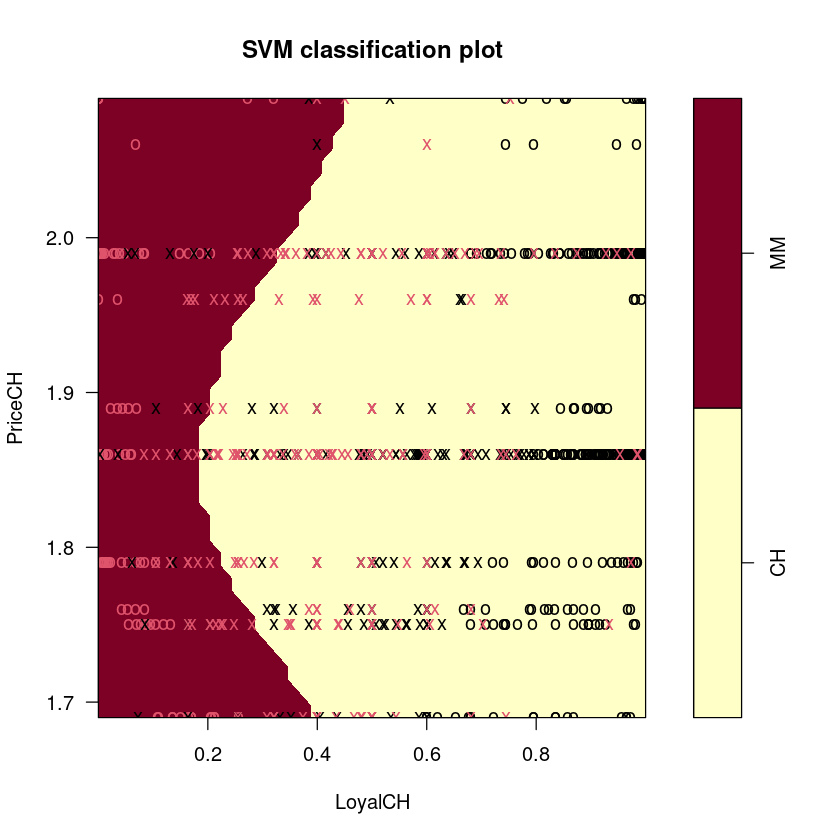

In [31]:
# Fit the SVM model with polynomial kernel, degree = 3
svm_poly3 <- svm(Purchase ~ PriceCH + LoyalCH, data = train_data, kernel = "polynomial", degree = 3, cost = 1)

# Plot the SVM model
plot(svm_poly3, train_data)

# Number of support vectors
svm_poly3$index
num_support_vectors3 <- length(svm_poly3$index)
print(num_support_vectors3)

# Evaluate performance on training data
train_preds_poly3 <- predict(svm_poly3, train_data)
confusion_matrix_train_poly3 <- table(Predicted = train_preds_poly3, Actual = train_data$Purchase)
accuracy_train_poly3 <- sum(diag(confusion_matrix_train_poly3)) / sum(confusion_matrix_train_poly3)
accuracy_train_poly3


From the analysis above the SVC model with the polynomial kernel (degree: 3 cost: 1) has 455 support vectors and an accuracy score of 75.8%. 

**(c) Use the better the degree with better performance from (a) and (b), predict on the test data. What’s the performance?**

In [32]:
# Predict on the test data - using svm poly3 with the highest accuracy score
test_preds_poly <- predict(svm_poly3, newdata = test_data)

# Evaluate performance on test data
confusion_matrix_test_poly <- table(Predicted = test_preds_poly, Actual = test_data$Purchase)
accuracy_test_poly <- sum(diag(confusion_matrix_test_poly)) / sum(confusion_matrix_test_poly)
accuracy_test_poly
confusion_matrix_test_poly

[1] 0.7850467

         Actual
Predicted  CH  MM
       CH 137  44
       MM   2  31

From the analysis above, the SVC model with the polynomial kernel (cost: 1, degree: 3) has an accuracy score of 78.5%. It is able to correctly predict 168 observations(purchases) using the test data

**V.	(10 points) Compare the performance in II(c), III(c), and IV(c). Which model is the best fit for the data in OJ? Did the result match your observation on the data? How?**

In [33]:
# Compare the test accuracies
test_accuracies <- c(accuracy_test, accuracy_test_radial, accuracy_test_poly)
names(test_accuracies) <- c("SVC", "SVM Radial", "SVM Polynomial")

# Print the comparison
test_accuracies


SVC     SVM Radial SVM Polynomial 
     0.8224299      0.8130841      0.7850467

Surprisingly the SVC with the linear kernel performed best with the highest accuracy score of 82.2% and is the best fit for the OJ data considering just the two predictors. 

## Problem 4. (50 points total): Practice ROC

Use the simulated data and the training and test datasets from Problem 2, follow Lab 9.6.3 to build a ROC curve.

I.	(10 points) Call the ROCR library. First, we build the function to plot the ROC curve. Use the prediction() function to create a prediction object. Use the performance() function to calculate TPR and FPR. Use plot() function to plot the ROC curve with true positive rate ("tpr") on the y-axis and the false positive rate ("fpr") on the x-axis.

In [34]:
# Install & Load Package
install.packages('ROCR')
library(ROCR)

# Downloading packages -------------------------------------------------------
- Downloading ROCR from CRAN ...                OK [451.7 Kb in 0.19s]
- Downloading gplots from CRAN ...              OK [485.3 Kb in 0.2s]
- Downloading gtools from CRAN ...              OK [352.8 Kb in 0.19s]
Successfully downloaded 3 packages in 0.98 seconds.

The following package(s) will be installed:
- gplots [3.2.0]
- gtools [3.9.5]
- ROCR   [1.0-11]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing gtools ...                         OK [installed binary and cached in 0.63s]
- Installing gplots ...                         OK [installed binary and cached in 0.7s]
- Installing ROCR ...                           OK [installed binary and cached in 0.7s]


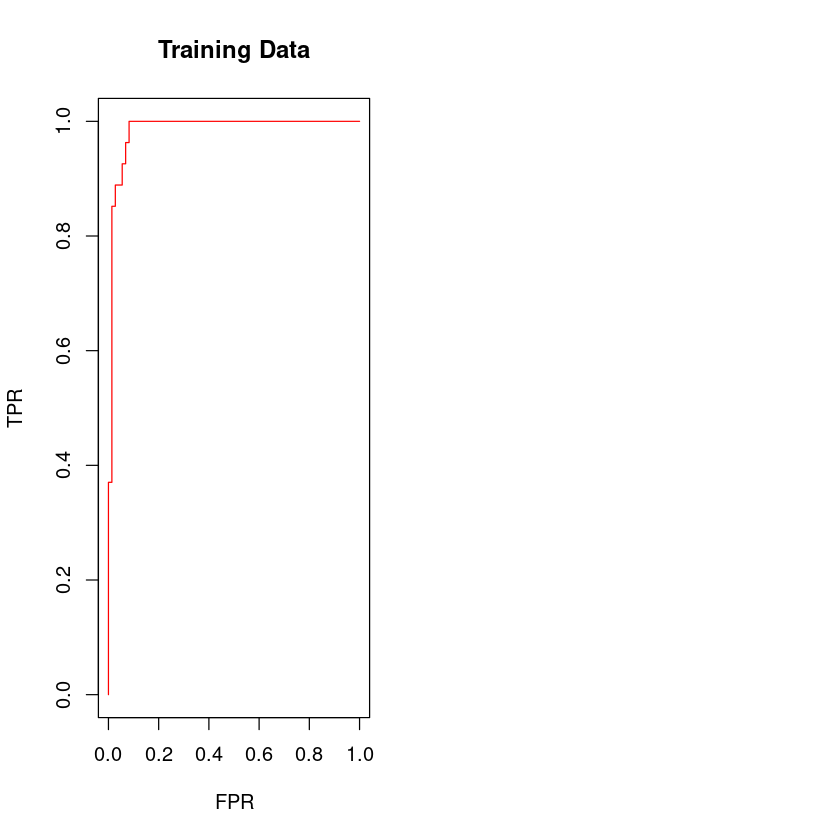

In [35]:
# Build function to plot ROC Curve
rocplot <- function(pred, truth, ...) {
  predob <- prediction(pred, truth)
  perf <- performance(predob, "tpr", "fpr")
  plot(perf, ...)
}

# Obtain true fitted models
svmfit.opt <- svm(y ~ ., data = dat[train , ],
kernel = "radial", gamma = 2, cost = 1,
decision.values = TRUE)
fitted <- attributes(
predict(svmfit.opt , dat[train , ], decision.values = TRUE)
)$decision.values

# ROC Plot
par(mfrow = c(1,2))
rocplot(-fitted, dat[train, 'y'], main = 'Training Data', xlab = 'FPR', ylab = 'TPR', col = 'red')

II.	(10 points) Obtain the fitted value for your SVM model. First use kernel = "radial", gamma = 2, cost = 1, to fit the SVM model on the training data you generated in problem 2. Make sure you use “decision.values = TRUE” when fitting your SVM function. Then use the predict() function to generate the fitted values. 

In [36]:
# SVM Model
svmfit.opt <- svm(y~., data=dat[train,], kernel = 'radial', gamma = 2, cost = 1, decision.values = TRUE)

# Fitted
fitted <- attributes(
  predict(svmfit.opt, dat[train,], decision.values = T)
)$decision.values

III.	(10 points) call the function you generate in I. to generate the ROC plot. 

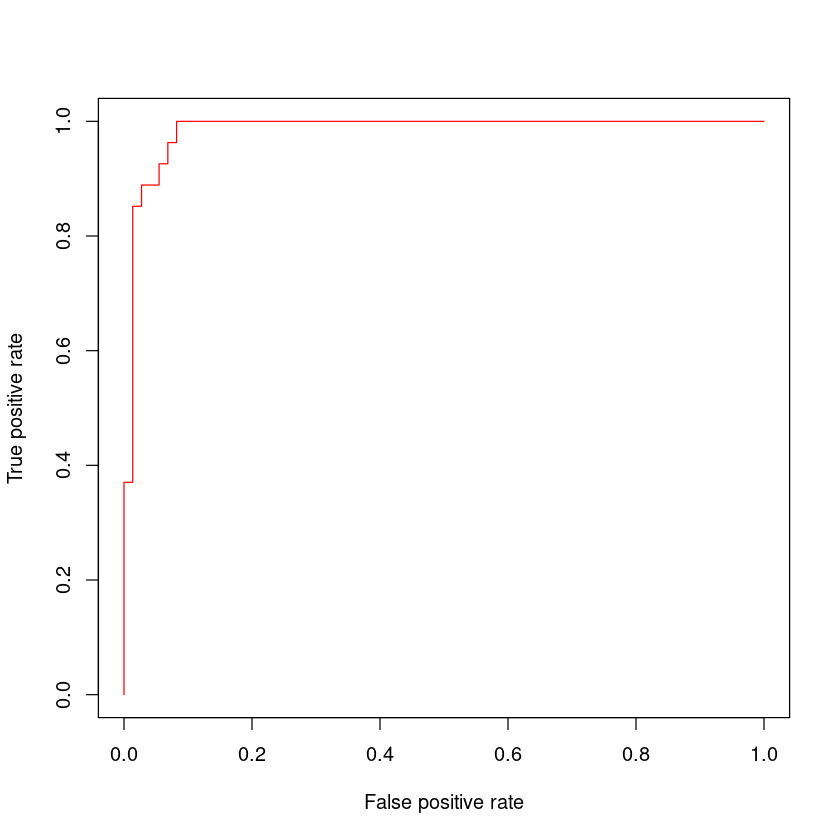

In [37]:
# New Plot
rocplot(-fitted, dat[train, 'y'], add = FALSE, col = 'red')

IV.	(5 points) use kernel=”"radial", gamma = 50, cost = 1, to fit the SVM model and generate ROC plot. 

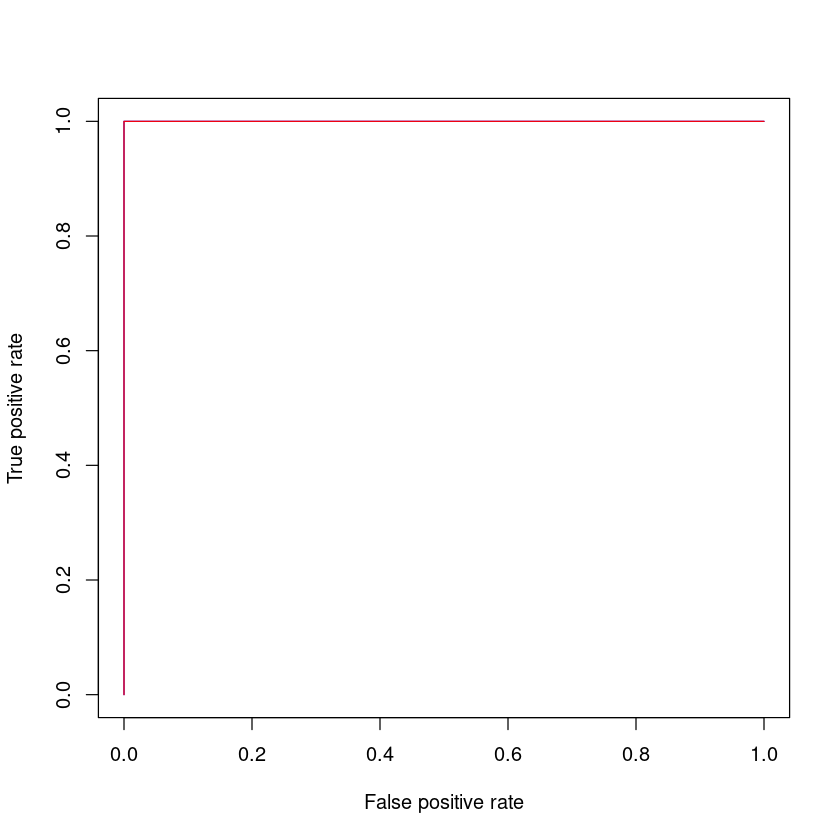

In [38]:
# Model
svmfit.flex <- svm(y ~ ., data = dat[train , ],
	kernel = "radial", gamma = 50, cost = 1,
	decision.values = TRUE)
fitted <- attributes(
	predict(svmfit.flex , dat[train , ], decision.values = TRUE)
	)$decision.values

# Initialize
rocplot(-fitted , dat[train , "y"], col = "blue")

# Second
rocplot(-fitted , dat[train , "y"], add = TRUE, col = "red")

V.	(5 points) use kernel=”"linear", to fit the SVC model and generate ROC plot.

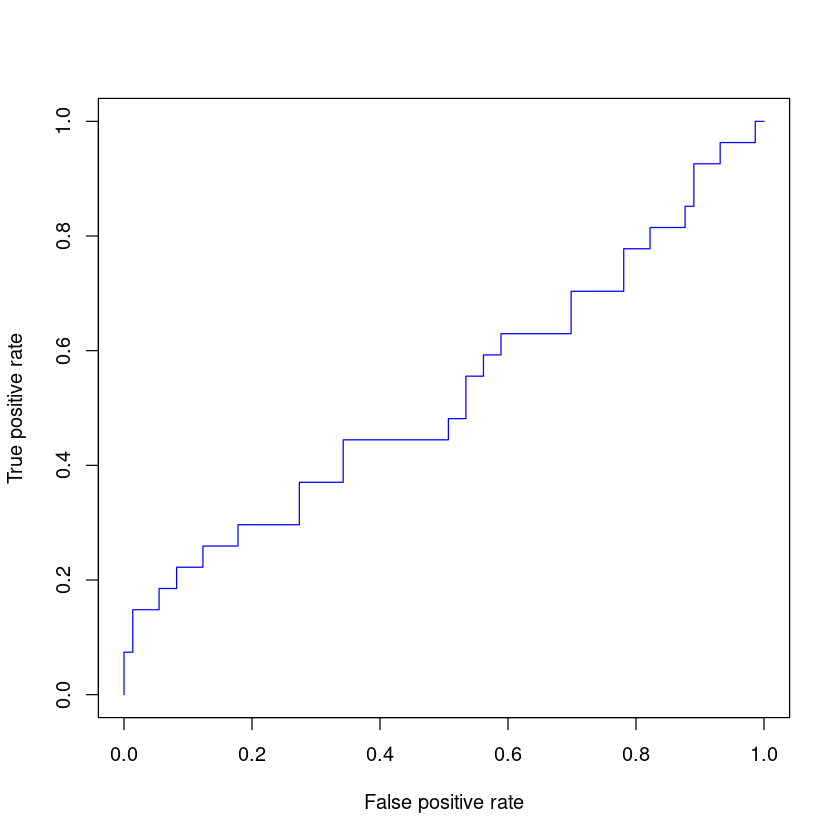

In [39]:
# SVM Linear Model
svmfit.linear <- svm(y ~ ., data = dat[train,],
	kernel = 'linear', cost = 1,
	decision.values = TRUE)
fitted <- attributes(
	predict(svmfit.linear, dat[train,], decision.values = TRUE)
	)$decision.values

# Plot ROC Curve
rocplot(-fitted, dat[train, 'y'], col = 'blue')

VI.	(10 points) Comparing the ROC in III, IV and V, which model performs the best, which the second, why?

**Based solely on the ROC in the above models**:
1. **High Gamma (Radial SVM)**
- Model is nearly perfect, achieving high true positive rates and low false positive rates.
- AUC is close to 1.0.
- **The model is likely overfitting due to the high gamma**. While it has the best reading, and performs the best based on the ROC graphs provided, this needs to be considered.
- This model is great for training data, but may not generalize well with unseen test data.

2. **Lower Gamma (Radial SVM)**
- ROC curve is still high-performing, just lower than the first model.
- AUC is likely around 0.95.
- **This model is strong while having less risk of overfitting.** It manages flexibility with complexity and provides a more realistic model that the high gamma model, even if the ROC isn't as high-performing.
- Better for testing data and likely the best model overall when examining all factors.

3. **Linear SVM**
- ROV curve is a diagonal line, showing that the classifier is struggling to separate classes.
- AUC is likely around 0.6, which is significantly worse than the other two options.
- **This model is likely underfitting**, as a linear SVM does not work with this particular dataset. Linear SVMs are best when the data is linearly separable, whereas radial kernels capture complex data best.

## Problem 5. (50 points total): Practice ROC

Use OJ dataset. With the dataset, we wish to predict a customer’s purchase decision by the price and loyalty. Use the dataset and the training and test datasets generated from Problem 3 I.  Call the ROCR library, call the function you generated in problem 4, I. 

I.	(10 points) Fit the SVC model with cost=10. Generate ROC plot

In [40]:
library(ISLR2)
data(OJ)

# Extracting required columns
OJ_data <- OJ[, c("Purchase", "PriceCH", "LoyalCH")]

# Convert 'Purchase' into a factor variable
OJ_data$Purchase <- as.factor(OJ_data$Purchase)
set.seed(1)  # Split the data into training (80%) and test (20%) sets 
train_indices <- sample(1:nrow(OJ_data), size = 0.8 * nrow(OJ_data)) 
train_data <- OJ_data[train_indices, ] 
test_data <- OJ_data[-train_indices, ]
# Build function to plot ROC Curve
rocplot <- function(pred, truth, ...) {
  predob <- prediction(pred, truth)
  perf <- performance(predob, "tpr", "fpr")
  plot(perf, ...)
}

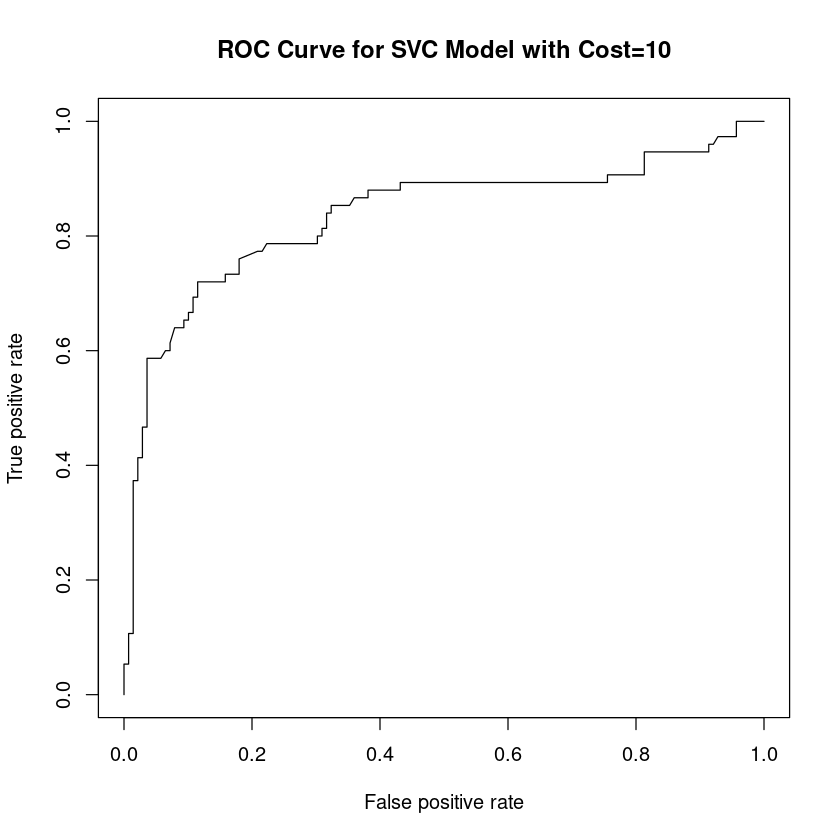

In [41]:
# Load necessary libraries
library(e1071)
library(ROCR)

# Fit the SVC model with cost=10
svc_model <- svm(Purchase ~ PriceCH + LoyalCH, data = train_data, cost = 10, probability = TRUE)

# Predict probabilities on the test set
svc_pred <- predict(svc_model, test_data, probability = TRUE)
svc_prob <- attr(svc_pred, "probabilities")[,2]  # Extract probabilities for the positive class

# Generate ROC plot
rocplot(svc_prob, test_data$Purchase, main = "ROC Curve for SVC Model with Cost=10")

II.	(10 points) Fit the SVM model with polynomial model with degree =2, and cost=10, Generate ROC plot.

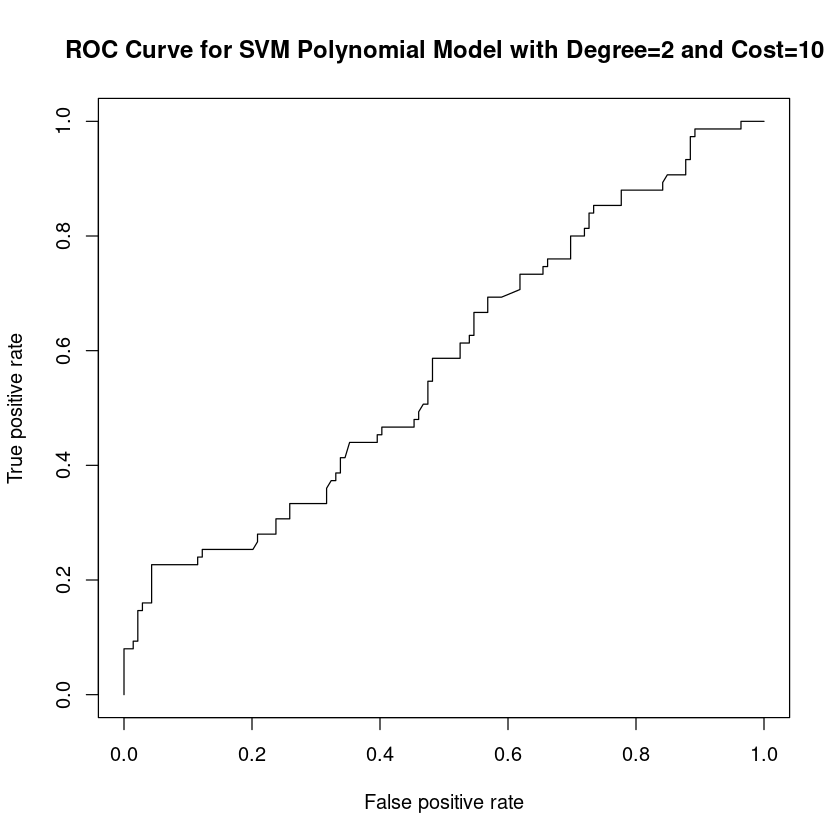

In [42]:
# Fit the SVM model with polynomial kernel of degree 2 and cost=10
svm_poly_model <- svm(Purchase ~ PriceCH + LoyalCH, data = train_data, kernel = "polynomial", degree = 2, cost = 10, probability = TRUE)

# Predict probabilities on the test set
svm_poly_pred <- predict(svm_poly_model, test_data, probability = TRUE)
svm_poly_prob <- attr(svm_poly_pred, "probabilities")[,2]  # Extract probabilities for the positive class

# Generate ROC plot
rocplot(svm_poly_prob, test_data$Purchase, main = "ROC Curve for SVM Polynomial Model with Degree=2 and Cost=10")

III.	(10 points) Fit the SVM model with radial model with gamma =2, and cost=10, Generate ROC plot.

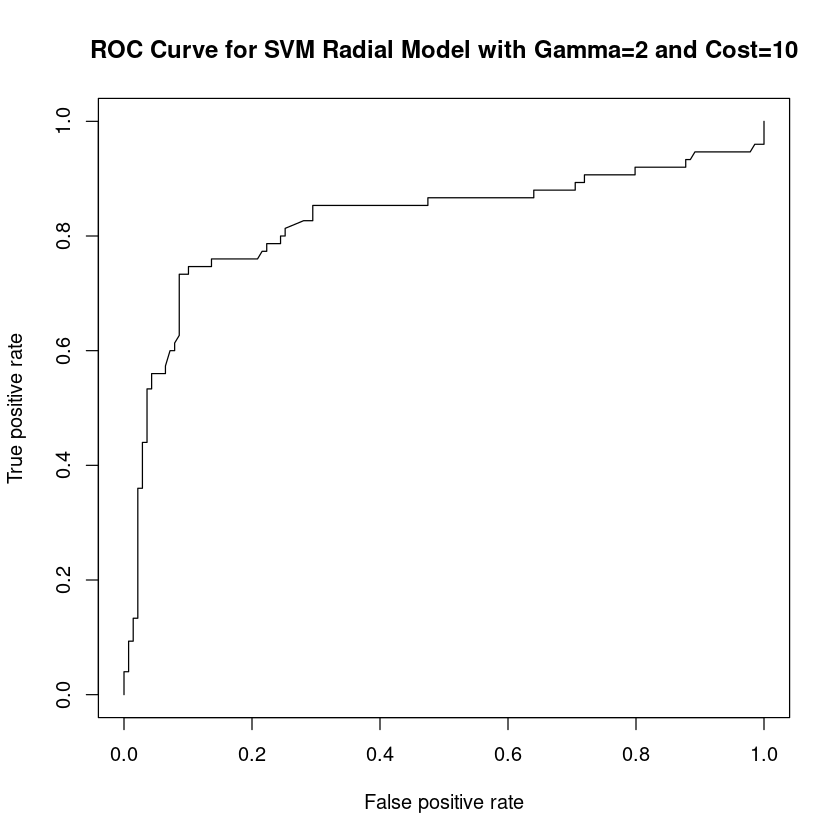

In [43]:
# Fit the SVM model with radial kernel with gamma=2 and cost=10
svm_radial_model <- svm(Purchase ~ PriceCH + LoyalCH, data = train_data, kernel = "radial", gamma = 2, cost = 10, probability = TRUE)

# Predict probabilities on the test set
svm_radial_pred <- predict(svm_radial_model, test_data, probability = TRUE)
svm_radial_prob <- attr(svm_radial_pred, "probabilities")[,2]  # Extract probabilities for the positive class

# Generate ROC plot
rocplot(svm_radial_prob, test_data$Purchase, main = "ROC Curve for SVM Radial Model with Gamma=2 and Cost=10")

IV.	(10 points) Comparing the ROC in I, II, and III, which model performs the best, which the second, why?


The best model is the svc model since it has the hoghest true rate with a low false positve rate, making it the best performing model.

The second best is the svm modal with gamma = 2 and cost = 10 performing slightly worse than the linear svc but still significantly better than the polymonial model

The polymonial model was the worst out of all of them and you can simply tell just by looking at it. The ROC curve is closer to the diagona, meaning poor classification ability

V.	(10 points) Is your comparison of the models based on ROC from IV different from the comparison you had in Problem 3 V? What is the additional information that ROC provides you?

No the comparisons are the same for both problems. ROC evaluates model performance across all thresholds, showing the tradeoffs between true positive and false positive rates. It also gives you the AUC which tells you about the classification ability. 

## Problem 6. (50 points total): SVM with multiple classes

In [44]:
# Packages
install.packages('ISLR2')
install.packages('e1071')
library(ISLR2)
library(e1071)

# Loading in Carseats dataset
data('Carseats')

The following package(s) will be installed:
- ISLR2 [1.3-2]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing ISLR2 ...                          OK [linked from cache]
# Downloading packages -------------------------------------------------------
- Downloading e1071 from CRAN ...               OK [582.2 Kb in 0.2s]
Successfully downloaded 1 package in 0.31 seconds.

The following package(s) will be installed:
- e1071 [1.7-16]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing e1071 ...                          OK [installed binary and cached in 0.64s]

The following loaded package(s) have been updated:
- e1071
Restart your R session to use the new versions.



If the response is a factor containing more than two levels, then the svm() function will perform multi-class classification using the one-versus-one approach. Explore it with the Carseat dataset
Same as in Assignment 1, problem 5 

I., create a categorical variable “High” to replace “Sales”, and add the variable to the Carseats dataset. Sales>8  is considered as “yes” for “High”; Sales<=8  is considered as “no” for High. Split the data into training dataset and test dataset with set.seed(2).


In [45]:
# Create categorical variable
Carseats$High <- ifelse(Carseats$Sales > 8, "Yes", "No")
Carseats$High <- as.factor(Carseats$High)

# Remove original Sales variable
Carseats <- Carseats[, !(names(Carseats) %in% "Sales")]

In [46]:
# Set seed
set.seed(2)

# Training and test
train_index <- sample(1:nrow(Carseats), size = floor(0.7 * nrow(Carseats)))
train_data <- Carseats[train_index, ]
test_data <- Carseats[-train_index, ]

# Data split
table(train_data$High)
table(test_data$High)


 No Yes 
161 119 


 No Yes 
 75  45 

II.	(10 points) Fit SVC to the training data with cost=10. Run the prediction with the test dataset with predict() function.

In [47]:
# Train SVM model with cost=10
svm_model <- svm(High~., data = train_data, kernel = 'linear', cost=10)
svm_predictions <- predict(svm_model, test_data)
head(svm_predictions)

# Check prediction accuracy
confusion_matrix <- table(Predicted = svm_predictions, Actual = test_data$High)
print(confusion_matrix)

# Compute accuracy
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(paste("Test Accuracy:", round(accuracy, 4)))

5  10  15  18  19  22 
 No  No Yes Yes Yes Yes 
Levels: No Yes

         Actual
Predicted No Yes
      No  68   3
      Yes  7  42
[1] "Test Accuracy: 0.9167"


III. (10 points) Fit SVM to the data with polynomial model with degree=2, and cost=10. Run the prediction with the test dataset with predict() function.

In [48]:
# Train SVM model with degree = 2, cost = 10
svm_poly <- svm(High ~ ., data = train_data, kernel = 'polynomial', degree = 2, cost = 10)
svm_poly_predictions <- predict(svm_poly, test_data)
head(svm_poly_predictions)

# Check prediction accuracy
confusion_matrix_poly <- table(Predicted = svm_poly_predictions, Actual = test_data$High)
print(confusion_matrix_poly)

# Compute accuracy
accuracy_poly <- sum(diag(confusion_matrix_poly)) / sum(confusion_matrix_poly)
print(paste("Test Accuracy (Polynomial Kernel, Degree=2):", round(accuracy_poly, 4)))

5  10  15  18  19  22 
 No  No Yes Yes Yes  No 
Levels: No Yes

         Actual
Predicted No Yes
      No  65   9
      Yes 10  36
[1] "Test Accuracy (Polynomial Kernel, Degree=2): 0.8417"


IV.	(10 points) Fit SVM to the data with radial model with gamma=5, and cost=10. Run the prediction with the test dataset with predict() function.

In [49]:
# Train SVM model with gamma = 5, cost = 10
svm_radial <- svm(High ~ ., data = train_data, kernel = "radial", gamma = 5, cost = 10)
svm_radial_predictions <- predict(svm_radial, test_data)
head(svm_radial_predictions)

# Check prediction accuracy
confusion_matrix_radial <- table(Predicted = svm_radial_predictions, Actual = test_data$High)
print(confusion_matrix_radial)

# Compute accuracy
accuracy_radial <- sum(diag(confusion_matrix_radial)) / sum(confusion_matrix_radial)
print(paste("Test Accuracy (Radial Kernel, Gamma=5):", round(accuracy_radial, 4)))

5 10 15 18 19 22 
No No No No No No 
Levels: No Yes

         Actual
Predicted No Yes
      No  75  45
      Yes  0   0
[1] "Test Accuracy (Radial Kernel, Gamma=5): 0.625"


V.	(10 points) Compare the models in II, III, and IV, which one performs the best? Why?

Along with creating each model, we took the time to create a confusion matrix and calculate the accuracy of each model. Based on this, our rankings are as follows:
1. Linear SVM
- The model's accuracy is 91.67%.
- The dataset likely has a linear decision boundary.
- The accuracy suggests minimal overfitting while capturing complexity.
2. Polynomial SVM (Degree = 2)
- The model's accuracy is 84.17%.
- The degree-2 polynomial kerneal introduces non-linearity, however, the dataset doesn't seem to require it.
- The additional complexity does not help the accuracy.
3. Radial SVM (Gamma = 5)
- The model's accuracy is 62.50%.
- The high gamma value made the mdel too sensitive to small variations.
- Severe overfitting occurred.

VI.	(10 points) Compare the best model in II, III, IV with the best performance tree you built in Assignment 1, problem 5, which models perform better? What do you think is the reason for the performance difference?

The tree in assignment 1, problem 5 had a 77% accuracy. This means that the models in II and III outperformed the decision tree, while model IV performed worse.

The performance difference is likely due to how the data's classes are split. We've discovered that the dataset likely has a linear decision boundary based on the accuracy of our first model, meaning a linear model is best for trying to create classifications. However, the decision tree created was based on individual splits and potentially overfitted the model.